In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# da rimuovre in quanto già presente nel file
class Dataset:
    def __init__(self, cvs_path: str):
        self.dataset = pd.read_csv(cvs_path)
        self.preporcessed = False
        self.standardized = False

    def preProcessing(self):
        if self.preporcessed == False:
            map_edu = {
                "No Formal Education": 0,
                "High School": 1,
                "Bachelor": 2,
                "Master": 3,
                "PhD": 4
                }

            # tarasformo gli attributi qualitativi ordinali in discreti
            self.dataset["education_level"] = self.dataset["education_level"].map(map_edu)
            self.dataset = pd.get_dummies(self.dataset, columns=["employment_status"], dtype = int)
            self.dataset = pd.get_dummies(self.dataset, columns=["religious_compatibility"], dtype = int)
            self.dataset = pd.get_dummies(self.dataset, columns=["marriage_type"], dtype = int)
            self.dataset = pd.get_dummies(self.dataset, columns=["conflict_resolution_style"], dtype = int)

            self.preporcessed = True
        else:
            print("Preprocessing già effettuato")


dataset = Dataset("/content/divorce_df.csv")
dataset.preProcessing()

In [ ]:
def analisi_multivariata(df: Dataset, fig_size: list = [8, 6]):

    df.dataset = df.dataset.drop(columns=['divorced'], errors='ignore') # per l'analisi droppiamo le labels
    # correlazione lineare
    corr = df.dataset.corr()
    plt.figure(figsize=fig_size)
    sns.heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1)
    plt.title('Matrice di correlazione (Pearson)')
    plt.show()

    # correlazione non lineare
    plt.figure(figsize=fig_size)
    corr_spearman = df.dataset.corr(method='spearman')
    sns.heatmap(corr_spearman,cmap="coolwarm", center=0, vmin=-1, vmax=1)
    plt.title('Correlazione di Spearman (non lineare)')
    plt.show()

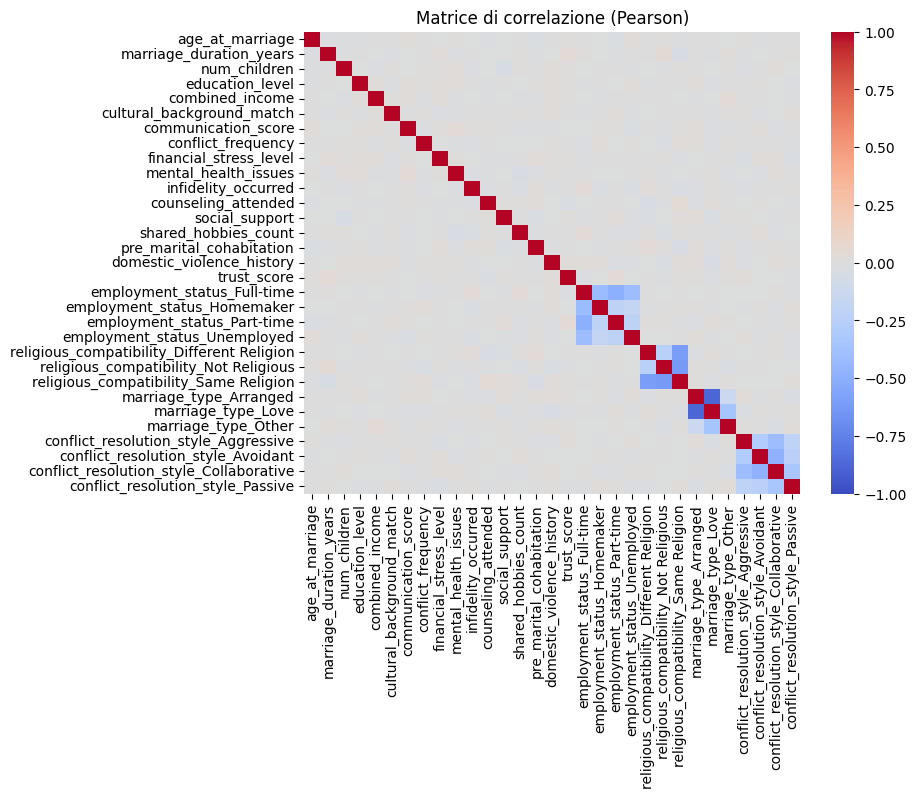

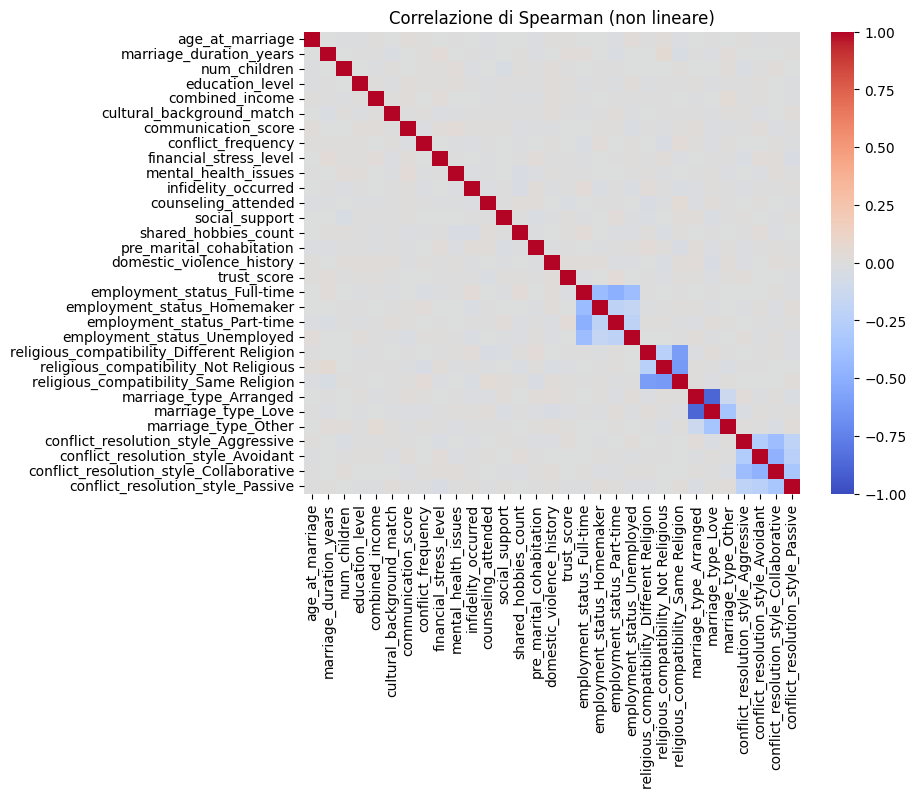

In [ ]:
analisi_multivariata(dataset)

Lo scopo di questa analisi multivariata è mettere in evidenza eventuali correlazioni lineari e non lineari tra le variabili del dataset.

Dai due heatmap (**Spearman** - correlazione basata sui ranghi - e Pearson - correlazione lineare) emergono alcuni dettagli che analizzeremo qua sotto:

* **Diagonale**: ogni attributo è perfettamente correlato con se stesso (abbiamo la correllazione massima, ovvero 1). Questo è normale e non ci fornisce informazioni aggiuntive.
* **Categorie mutuamente esclusive**: si notano correlazioni negative molto forti tra colonne che rappresentano categorie one-hot mutuamente esclusive.  Questo lo ritroviamo ad esempio tra: `"conflict_resolution_style_Collaborative <-> conflict_resolution_style_Passive"` : la correlazione negativa riflette il fatto che, essendo categorie alternative per lo stesso attributo, quando una è attiva l'altra è tipicamente nulla.

* **Assenza di forti correlazioni generalizzate**: confrontando i due plot non emergono correlazioni lineari o monotone molto forti tra variabili diverse (escluse le correlazioni dovute a dummy mutuamente esclusive). Questo suggerisce che non esistono relazioni bivariate dominanti che spiegano gran parte della variabilità del dataset.

* **Differenze Spearman vs Pearson**: i due plot sono sostanzialmente simili tra loro. Poiché Spearman misura correlazioni monotone (anche non lineari) mentre Pearson misura correlazioni lineari, la somiglianza tra le matrici implica che non sono presenti forti relazioni monotone non lineari non rilevate da Pearson.

Nonostante ciò ci sono alcune deboli associazioni sia positive che negative.